# Comparison of prototype latencies

## Imports

In [1]:
import numpy as np
import h5py
from matplotlib import pyplot as plt

## Load signal and filter output from file

In [2]:
PYTHON_ECHO_FPATH = '../data/results/python_echo.h5'
with h5py.File(PYTHON_ECHO_FPATH, 'r') as f:
    fp_python_echo = f['filter_preds'][:]
    rt_python_echo = f['rt_times_us'][:]
    
PYTHON_LMS_FPATH = '../data/results/python_lms.h5'
with h5py.File(PYTHON_LMS_FPATH, 'r') as f:
    fp_python_lms = f['filter_preds'][:]
    rt_python_lms = f['rt_times_us'][:]

JULIA_ECHO_FPATH = '../data/results/julia_echo.h5'
with h5py.File(JULIA_ECHO_FPATH, 'r') as f:
    fp_julia_echo = f['filter_preds'][:]
    rt_julia_echo = f['rt_times_us'][:]
    
RUST_ECHO_FPATH = '../data/results/rust_echo.h5'
with h5py.File(RUST_ECHO_FPATH, 'r') as f:
    fp_rust_echo = f['filter_preds'][:]
    rt_rust_echo = f['rt_times_us'][:]
    
RUST_LMS_FPATH = '../data/results/rust_lms.h5'
with h5py.File(RUST_LMS_FPATH, 'r') as f:
    fp_rust_lms = f['filter_preds'][:]
    rt_rust_lms = f['rt_times_us'][:]

## Latency distribution (Echo)

In [3]:
print(f'Median (Python echo): {np.median(rt_python_echo):.2f} us')
print(f'Median (Julia echo): {np.median(rt_julia_echo):.2f} us')
print(f'Median (Rust echo): {np.median(rt_rust_echo):.2f} us')

Median (Python echo): 45.00 us
Median (Julia echo): 109.75 us
Median (Rust echo): 37.01 us


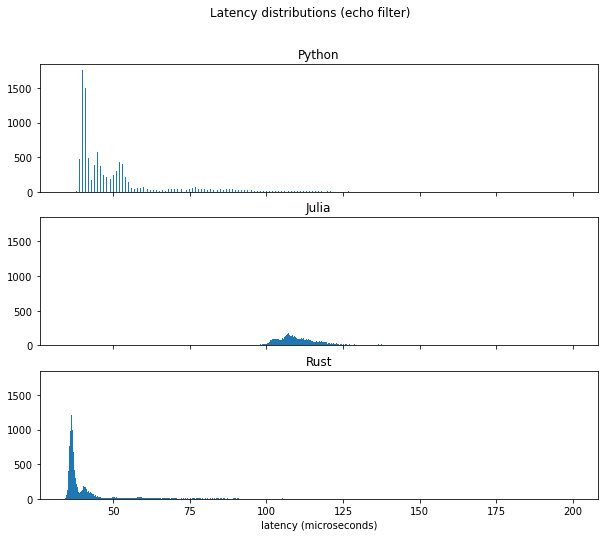

In [5]:
ECHO_PLT_MAX = 200

fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True, sharey=True)

ax[0].set_title('Python');
ax[0].hist(rt_python_echo[rt_python_echo < ECHO_PLT_MAX], bins=500)

ax[1].set_title('Julia');
ax[1].hist(rt_julia_echo[rt_julia_echo < ECHO_PLT_MAX], bins=500)

ax[2].set_title('Rust');
ax[2].set(xlabel='latency (microseconds)')
ax[2].hist(rt_rust_echo[rt_rust_echo < ECHO_PLT_MAX], bins=500);

fig.suptitle('Latency distributions (echo filter)')

plt.savefig('img/echo_latencies.png')

The latency distribution plots show that the echo filter latencies for the Python and Rust prototypes are very simliar, while Julia is slightly slower. The more discretized Python data is due to the fact that Python computes time in microseconds, while Rust computes it at the nanosecond level.

## Latency distribution (LMS)

In [18]:
print(f'Median (Python LMS): {np.median(rt_python_lms):.2f} us')
print(f'Median (Rust LMS): {np.median(rt_rust_lms):.2f} us')

Median (Python LMS): 8717.00 us
Median (Rust LMS): 11173.65 us


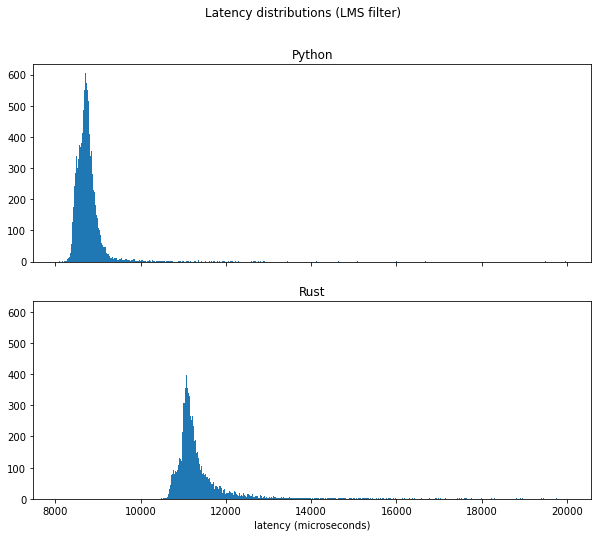

In [26]:
LMS_PLT_MAX = 20000

fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)

ax[0].set_title('Python');
ax[0].hist(rt_python_lms[rt_python_lms < LMS_PLT_MAX], bins=500)

ax[1].set_title('Rust');
ax[1].set(xlabel='latency (microseconds)')
ax[1].hist(rt_rust_lms[rt_rust_lms < LMS_PLT_MAX], bins=500);

fig.suptitle('Latency distributions (LMS filter)')

plt.savefig('img/lms_latencies.png')